# Object Detection Inference on Yolov8

## Installing the Necessary Dependencies

In [ ]:
!pip install ultralytics

## Obtaining the Test Set

In [ ]:
!wget https://storage.googleapis.com/nuimages/nuImages-test.tar.gz

In [ ]:
!tar -xf nuImages-test.tar.gz -C ./
%rm nuImages-test.tar.gz

In [ ]:
!wget https://storage.googleapis.com/nuimages/best.pt
!wget https://storage.googleapis.com/nuimages/last.pt

## Predicting with the trained model

In [ ]:
from ultralytics import YOLO
import os
from PIL import Image

In [ ]:
ckpt = 'best.pt' # path to the weights
test_path = './datasets/nuImages/images/test' # path to the test images

In [ ]:
# Load the model

model = YOLO(ckpt)

In [ ]:
# Pick a set

test_set = [os.path.join(test_path, img) for img in os.listdir(test_path)[10:20]]
test_set

In [ ]:
# Predict on the samples

results = model.predict(test_set, save=True, imgsz=960, iou=0.6, conf=0.5)

In [ ]:
# Now let's see the predictions

for i, r in enumerate(results):
    im_bgr = r.plot()
    im_rgb = Image.fromarray(im_bgr[..., ::-1])

    display(im_rgb)
    r.save(filename=f"results{i}.jpg")

## OOD

Now let's have some fun and evaluate with the OOD samples.

In [ ]:
!wget https://storage.googleapis.com/nuimages/OOD.jpg
!wget https://storage.googleapis.com/nuimages/ood_night.jpg

In [ ]:
ood_result = model.predict('ood_night.jpg', imgsz=960, iou=0.6, conf=0.3)

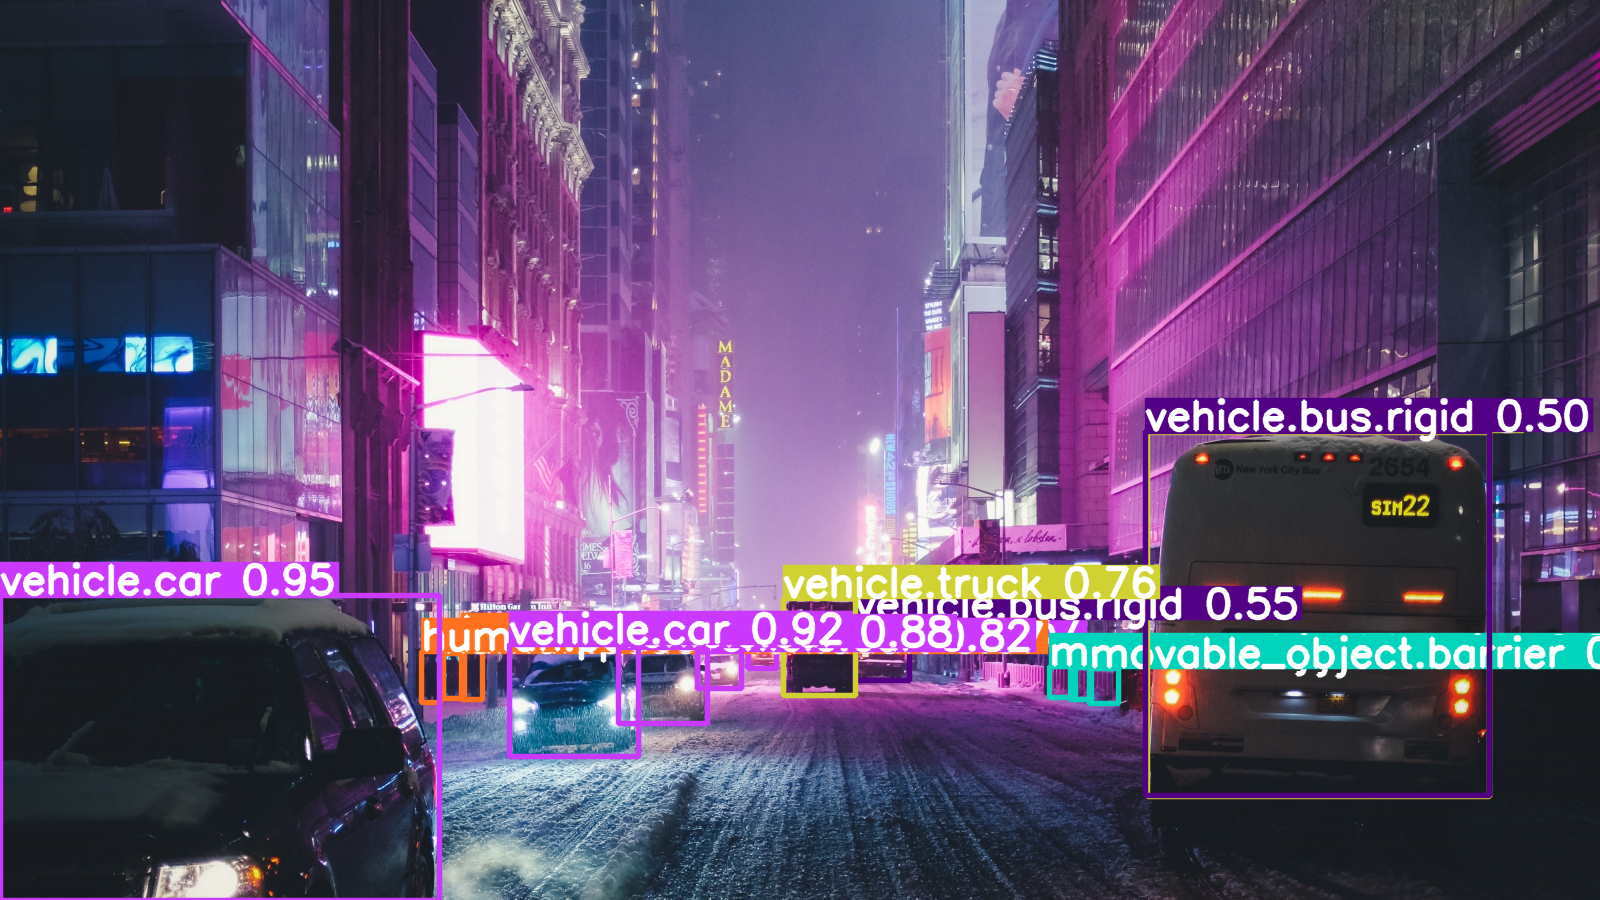

'ood_pred.jpg'

In [ ]:
r = ood_result[0]
im_bgr = r.plot()
im_rgb = Image.fromarray(im_bgr[..., ::-1])

display(im_rgb)
r.save(filename=f"ood_pred.jpg")